# EDA of LeBron James Shotchart

## Import Modules and Data

In [90]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from nba_api.stats.static import players
player_dict = players.get_players()

lebron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
lebron_id = lebron['id']   

from nba_api.stats.static import teams
teams = teams.get_teams()
LAL = [x for x in teams if x['full_name'] == 'Los Angeles Lakers'][0]
LAL_id = LAL['id']

In [92]:
shotchart_lebron = shotchartdetail.ShotChartDetail(player_id = lebron_id, team_id = LAL_id)
                                                  
df = shotchart_lebron.get_data_frames()[0]

## Initial Look at Dataframe

In [93]:
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200002,98,2544,LeBron James,1610612747,Los Angeles Lakers,1,5,24,...,Center(C),Less Than 8 ft.,3,-26,16,1,1,20221018,GSW,LAL
1,Shot Chart Detail,0022200002,233,2544,LeBron James,1610612747,Los Angeles Lakers,2,11,30,...,Center(C),Less Than 8 ft.,1,-1,11,1,1,20221018,GSW,LAL
2,Shot Chart Detail,0022200002,252,2544,LeBron James,1610612747,Los Angeles Lakers,2,10,5,...,Center(C),Less Than 8 ft.,1,-16,1,1,1,20221018,GSW,LAL
3,Shot Chart Detail,0022200002,356,2544,LeBron James,1610612747,Los Angeles Lakers,2,3,53,...,Center(C),Less Than 8 ft.,1,9,11,1,1,20221018,GSW,LAL
4,Shot Chart Detail,0022200002,382,2544,LeBron James,1610612747,Los Angeles Lakers,2,1,48,...,Center(C),Less Than 8 ft.,0,9,2,1,1,20221018,GSW,LAL


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            609 non-null    object
 1   GAME_ID              609 non-null    object
 2   GAME_EVENT_ID        609 non-null    int64 
 3   PLAYER_ID            609 non-null    int64 
 4   PLAYER_NAME          609 non-null    object
 5   TEAM_ID              609 non-null    int64 
 6   TEAM_NAME            609 non-null    object
 7   PERIOD               609 non-null    int64 
 8   MINUTES_REMAINING    609 non-null    int64 
 9   SECONDS_REMAINING    609 non-null    int64 
 10  EVENT_TYPE           609 non-null    object
 11  ACTION_TYPE          609 non-null    object
 12  SHOT_TYPE            609 non-null    object
 13  SHOT_ZONE_BASIC      609 non-null    object
 14  SHOT_ZONE_AREA       609 non-null    object
 15  SHOT_ZONE_RANGE      609 non-null    object
 16  SHOT_DIS

## Data Cleanup

After looking through the data frame, I noticed a lot of columns that were either identification columns or were non-unique columns and needed to be removed.

In [95]:
# remove non-unique and unneeded columns
df.drop(columns = ['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','EVENT_TYPE'], axis = 1, inplace = True)

## Feature Engineering

In [96]:
df['GAME_DATE_MONTH'] = df['GAME_DATE'].astype(str).str[4:6]
df['HOME_GAME'] = np.where(df['HTM'] == 'LAL', 1, 0)
df['SECONDS_REMAINING'] = df['MINUTES_REMAINING'] * 60 + df['SECONDS_REMAINING']
df

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,GAME_DATE_MONTH,HOME_GAME
0,1,5,324,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-26,16,1,1,20221018,GSW,LAL,10,0
1,2,11,690,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-1,11,1,1,20221018,GSW,LAL,10,0
2,2,10,605,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-16,1,1,1,20221018,GSW,LAL,10,0
3,2,3,233,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,9,11,1,1,20221018,GSW,LAL,10,0
4,2,1,108,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,9,2,1,1,20221018,GSW,LAL,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,3,3,232,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,19,1,1,20230409,LAL,UTA,04,1
605,4,8,515,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-67,243,1,1,20230409,LAL,UTA,04,1
606,4,3,212,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,-75,294,1,1,20230409,LAL,UTA,04,1
607,4,1,67,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-29,253,1,1,20230409,LAL,UTA,04,1


In [97]:
df.drop(columns = ['HTM','VTM','GAME_DATE', 'MINUTES_REMAINING'], axis = 1, inplace = True)
df

,PERIOD,SECONDS_REMAINING,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE_MONTH,HOME_GAME
0,1,324,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,-26,16,1,1,10,0
1,2,690,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-1,11,1,1,10,0
2,2,605,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-16,1,1,1,10,0
3,2,233,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,9,11,1,1,10,0
4,2,108,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,9,2,1,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,3,232,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,5,19,1,1,04,1
605,4,515,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-67,243,1,1,04,1
606,4,212,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,-75,294,1,1,04,1
607,4,67,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,-29,253,1,1,04,1


## Overview Look of Final Dataset

In [98]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 609
Number of columns: 14


In [99]:
df.columns

Index(['PERIOD', 'SECONDS_REMAINING', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG',
       'GAME_DATE_MONTH', 'HOME_GAME'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PERIOD               609 non-null    int64 
 1   SECONDS_REMAINING    609 non-null    int64 
 2   ACTION_TYPE          609 non-null    object
 3   SHOT_TYPE            609 non-null    object
 4   SHOT_ZONE_BASIC      609 non-null    object
 5   SHOT_ZONE_AREA       609 non-null    object
 6   SHOT_ZONE_RANGE      609 non-null    object
 7   SHOT_DISTANCE        609 non-null    int64 
 8   LOC_X                609 non-null    int64 
 9   LOC_Y                609 non-null    int64 
 10  SHOT_ATTEMPTED_FLAG  609 non-null    int64 
 11  SHOT_MADE_FLAG       609 non-null    int64 
 12  GAME_DATE_MONTH      609 non-null    object
 13  HOME_GAME            609 non-null    int32 
dtypes: int32(1), int64(7), object(6)
memory usage: 64.4+ KB


In [101]:
# create the basketball court
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax
#code for the court from bradleyfay
#https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb

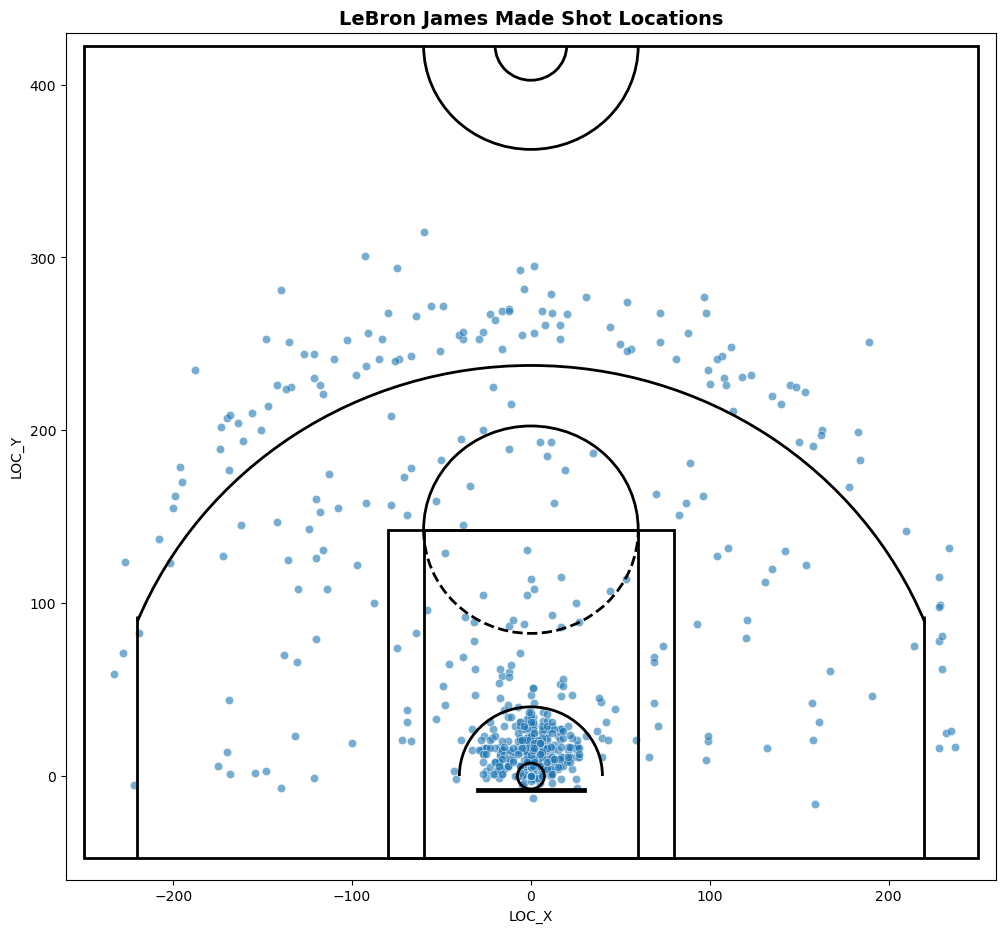

In [102]:
plt.figure(figsize=(12,11))
ax = sns.scatterplot(data = df, x = df['LOC_X'], y = df['LOC_Y'], alpha = 0.6)
draw_court(outer_lines=True)
plt.xlim(-260,260)
plt.ylim(-60,430)
ax.set_title('LeBron James Made Shot Locations', fontsize = 14, fontweight = 'bold')
plt.show()

## Analysis Based on Time

This section of the analysis will look at how the quarter, time remaining in the quarter, and month of the year effected the shot selection of LeBron

### Quater Vs Shot Selection

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\3268275441.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


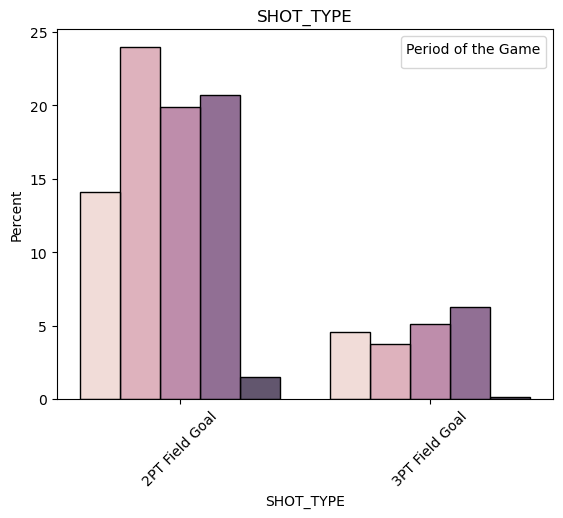

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\3268275441.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


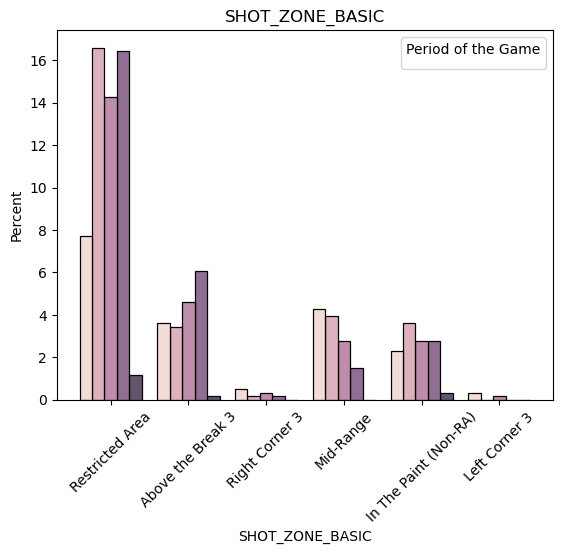

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\3268275441.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


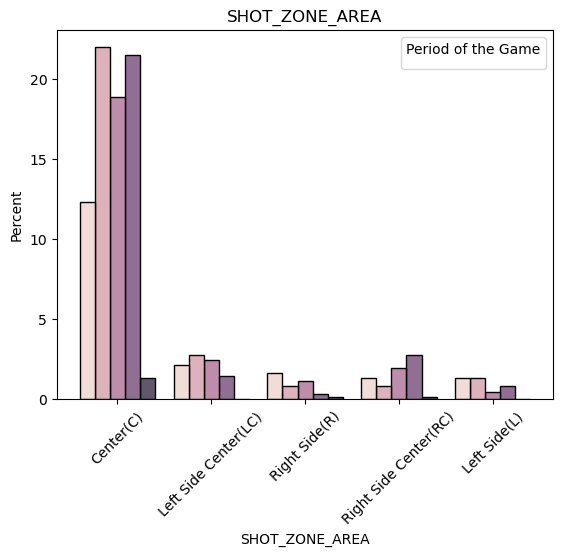

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\3268275441.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


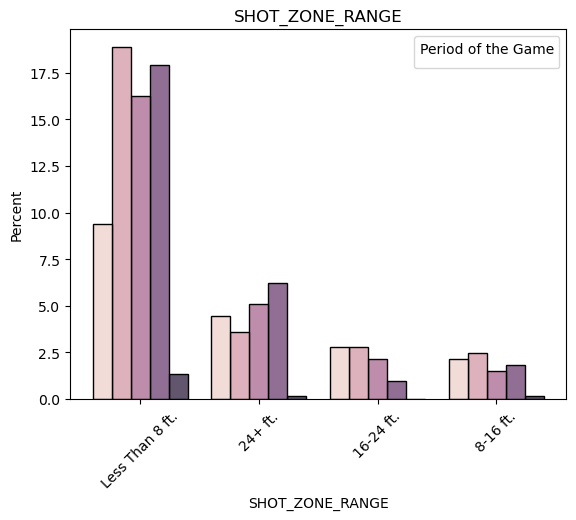

In [103]:
variables_of_interest = ['SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE']

for var in variables_of_interest:
    ax = sns.histplot(x = var, hue = 'PERIOD', data = df, multiple = 'dodge', stat = 'percent', shrink = 0.8)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
    ax.legend(title = 'Period of the Game')
    ax.set_title(var)
    plt.show()

### Month of the Year Vs Shot Selection

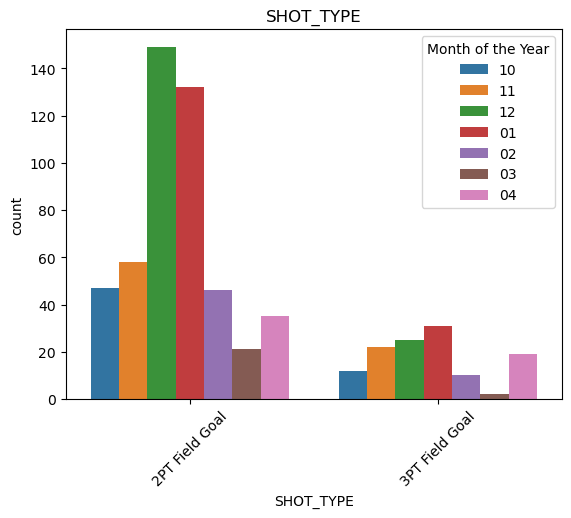

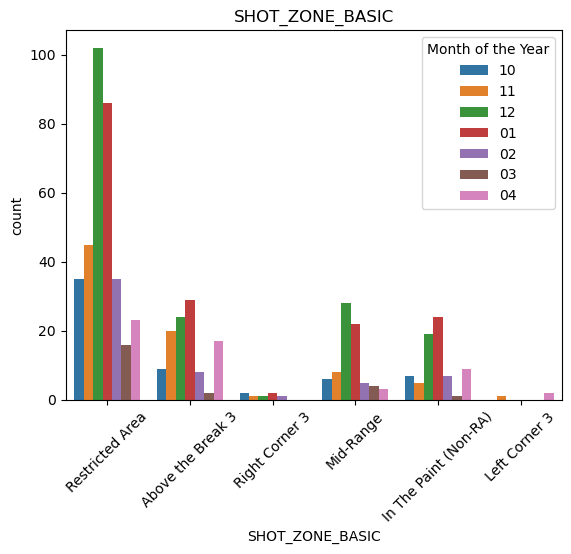

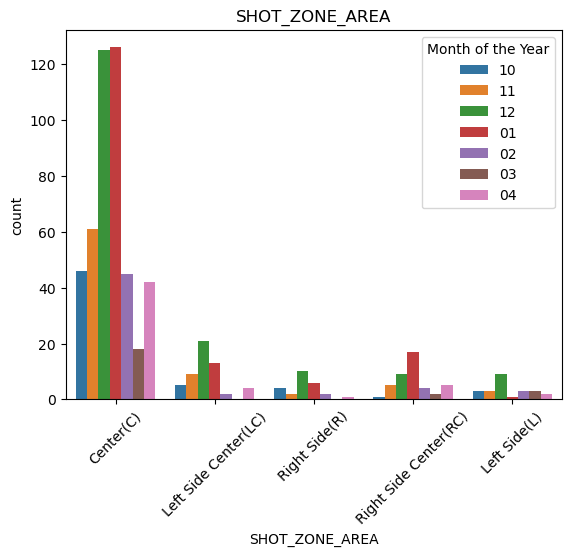

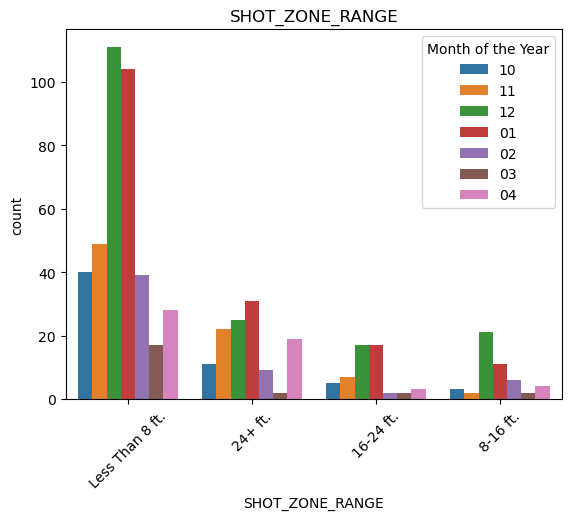

In [104]:
variables_of_interest = ['SHOT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','SHOT_ZONE_RANGE']
for var in variables_of_interest:
    ax = sns.countplot(x = var, hue = 'GAME_DATE_MONTH', data = df)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
    ax.legend(title = 'Month of the Year')
    ax.set_title(var)
    plt.show()

It appears that this season, LeBron took over shooting the ball during the months of December and January as these were major spikes in the amount of make shots across all subcategories.

### Time Remaining in the Quarter Vs Shot Selection

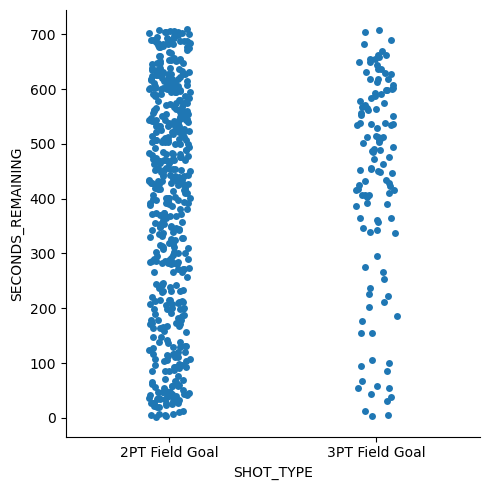

In [105]:
ax = sns.catplot(data = df, x = 'SHOT_TYPE', y = 'SECONDS_REMAINING', jitter = True)
plt.show()

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\136329294.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right')


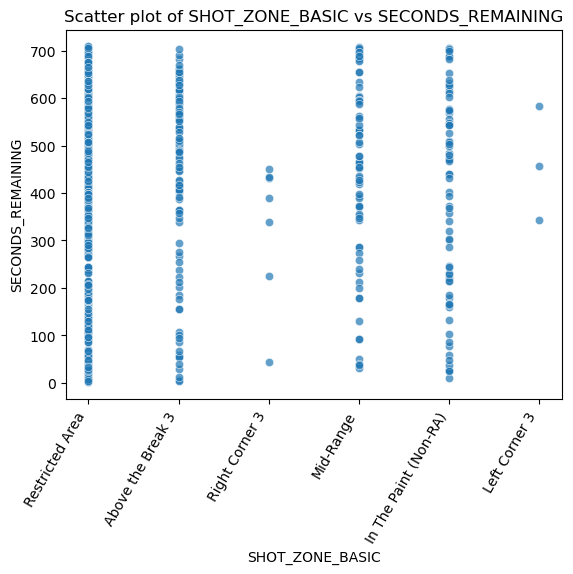

In [106]:
ax = sns.scatterplot(data = df, x = 'SHOT_ZONE_BASIC', y = 'SECONDS_REMAINING', alpha = 0.7)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right')
ax.set_title('Scatter plot of SHOT_ZONE_BASIC vs SECONDS_REMAINING')
plt.show()

One key pattern I noticed is that regardless of the time remaining in the quarter, LeBron prefers to drive into the restricted area. Outside of this, he seems to take more three point shots where there is more time left on the clock than towards the end of the quarter.

C:\Users\wbpar\AppData\Local\Temp\ipykernel_4640\3775459669.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right')


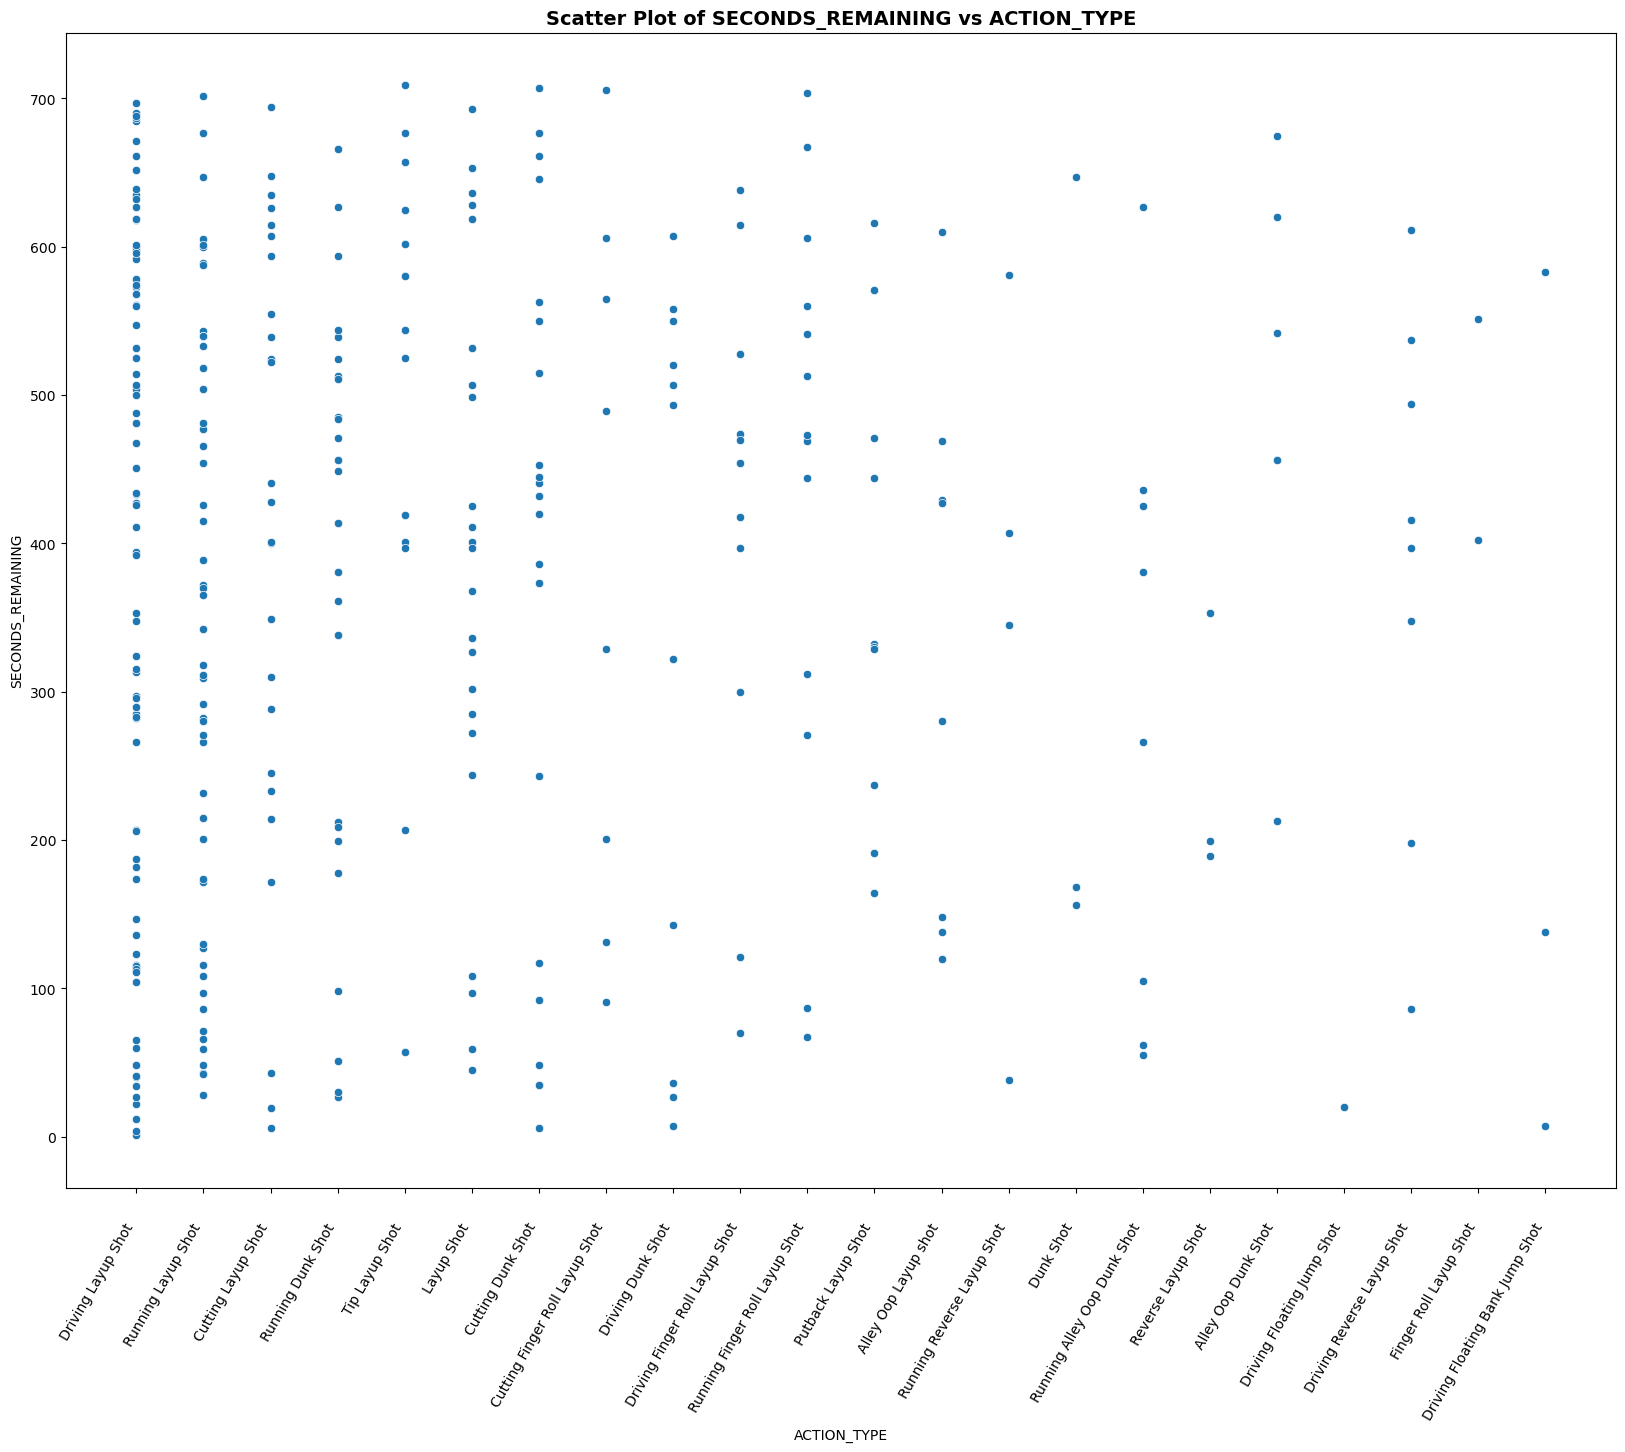

In [107]:
mid_range = df[df['SHOT_ZONE_BASIC'] == 'Restricted Area']
plt.figure(figsize = (20,15))
ax = sns.scatterplot(mid_range, x = 'ACTION_TYPE', y = 'SECONDS_REMAINING')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 60, ha = 'right')
ax.tick_params(axis = 'x', which = 'major', pad = 20)
ax.set_title('Scatter Plot of SECONDS_REMAINING vs ACTION_TYPE', fontsize = 14, fontweight = 'bold')
plt.show()

It can be seen from the plot that when LeBron makes it into the restricted zone, his favorite shot is the driving layup.

### How does the time remain effect the distance of the shot?

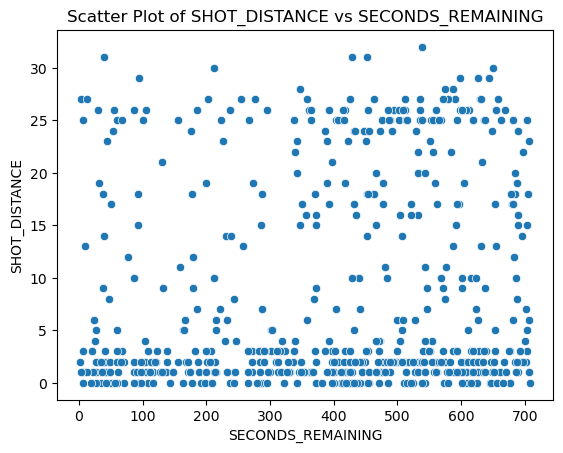

In [108]:
ax = sns.scatterplot(data = df, x = 'SECONDS_REMAINING', y = 'SHOT_DISTANCE')
ax.set_title('Scatter Plot of SHOT_DISTANCE vs SECONDS_REMAINING')
plt.show()

Once again the patter of longer distance shots being taken early in the quarter can be seen here.